In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
sells_df = pd.read_csv("Electronic_sales.csv")

# Задание 1

In [24]:
sells_df['Payment Method'] = sells_df['Payment Method'].astype('category')

In [72]:
payment_counts = sells_df.groupby(['Customer ID', 'Payment Method'], observed=True).size().reset_index(name='counts')

favorite_payment = payment_counts.loc[payment_counts.groupby('Customer ID')['counts'].idxmax()]

print(f"Любимый метод оплаты\n{favorite_payment}")

Любимый метод оплаты
       Customer ID Payment Method  counts
0             1000    Credit Card       1
2             1002           Cash       1
4             1003           Cash       1
5             1004    Credit Card       1
6             1005     Debit Card       1
...            ...            ...     ...
17144        19994  Bank Transfer       1
17145        19995    Credit Card       1
17146        19996  Bank Transfer       2
17149        19997  Bank Transfer       1
17150        19998  Bank Transfer       1

[12136 rows x 3 columns]


In [ ]:
total_sells = sells_df["Total Price"].sum()

print(f"Общие траты: {total_sells:.2f}")

Общие траты: 63602668.37


In [ ]:
total_sells_succsess = sells_df[sells_df["Order Status"] == "Completed"]["Total Price"].sum()

print(f"Общие траты (успешные): {total_sells_succsess:.2f}")

Общие траты (успешные): 42629615.57


In [28]:
ts_by_client = sells_df.groupby("Customer ID")["Total Price"].sum()

ts_by_client_succsess = sells_df[sells_df["Order Status"] == "Completed"].groupby("Customer ID")["Total Price"].sum()

In [29]:
print("Обшие траты клиентов:")
ts_by_client

Обшие траты клиентов:


Customer ID
1000      6279.42
1002      5020.60
1003        41.50
1004        83.00
1005     11779.11
           ...   
19994     5504.87
19995     5394.56
19996    27296.78
19997     2528.26
19998      674.32
Name: Total Price, Length: 12136, dtype: float64

In [30]:
print("Обшие успешные траты клиентов:")
ts_by_client_succsess

Обшие успешные траты клиентов:


Customer ID
1000       741.09
1002      5020.60
1003        41.50
1004        83.00
1005     11779.11
           ...   
19990     9117.44
19991    12368.06
19995     5394.56
19996    12063.02
19998      674.32
Name: Total Price, Length: 9466, dtype: float64

In [31]:
a_total_additional_sells = sells_df["Add-on Total"].sum()

In [32]:
print(f"{a_total_additional_sells:.2f}")

1244896.96


In [33]:
s_total_additional_sells = sells_df[sells_df["Order Status"] == "Completed"]["Add-on Total"].sum()

In [34]:
print(f"{s_total_additional_sells:.2f}")

835595.24


In [35]:
a_total_additional_sells_by_client = sells_df.groupby("Customer ID")["Add-on Total"].sum()

In [36]:
s_total_additional_sells_by_client = sells_df[sells_df["Order Status"] == "Completed"].groupby("Customer ID")["Add-on Total"].sum()

In [ ]:
first_final_df = (
    sells_df["Customer ID"].drop_duplicates().to_frame()
        .join(favorite_payment.set_index("Customer ID"), on="Customer ID", how='left')
        .join(ts_by_client.rename("Total Sells"), on="Customer ID", how='left')
        .join(ts_by_client_succsess.rename("Total Sells Success"), on="Customer ID", how='left')
        .join(a_total_additional_sells_by_client.rename("Add-on Total Sells"), on="Customer ID", how='left')
        .join(s_total_additional_sells_by_client.rename("Add-on Total Sells Success"), on="Customer ID", how='left')
)

In [68]:
first_final_df.drop("counts", axis=1, inplace=True)

# Результат Задания 1

In [69]:
first_final_df

,Customer ID,Payment Method,Total Sells,Total Sells Success,Add-on Total Sells,Add-on Total Sells Success
0,1000,Credit Card,6279.42,741.09,66.30,26.09
2,1002,Cash,5020.60,5020.60,60.16,60.16
4,1003,Cash,41.50,41.50,35.56,35.56
5,1004,Credit Card,83.00,83.00,65.78,65.78
6,1005,Debit Card,11779.11,11779.11,75.33,75.33
...,...,...,...,...,...,...
19990,19994,Bank Transfer,5504.87,NaN,93.17,NaN
19991,19995,Credit Card,5394.56,5394.56,0.00,0.00
19992,19996,Bank Transfer,27296.78,12063.02,432.12,198.98
19998,19997,Bank Transfer,2528.26,NaN,101.34,NaN


# Задание 2

Если доход то нас не интересуют строки с отменённым заказом

In [39]:
succsess_sells_df = sells_df[sells_df["Order Status"] == "Completed"]

In [41]:
by_shipping = succsess_sells_df.groupby("Shipping Type")["Total Price"].sum()

In [42]:
by_shipping

Shipping Type
Expedited     8430385.58
Express       5632093.35
Overnight     5887722.52
Same Day      8292376.50
Standard     14387037.62
Name: Total Price, dtype: float64

<Axes: title={'center': 'Продажи по типу доставки'}, ylabel='Доля'>

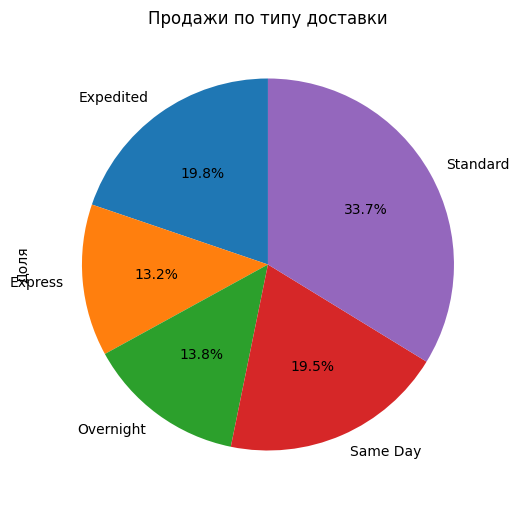

In [73]:
by_shipping.plot(kind='pie', title='Продажи по типу доставки', ylabel='Доля', autopct='%1.1f%%', startangle=90, figsize=(6,10))

In [43]:
by_product_category = succsess_sells_df.groupby("Product Type")["Total Price"].sum()

In [44]:
by_product_category

Product Type
Headphones     2734651.00
Laptop         8365905.25
Smartphone    14407835.84
Smartwatch     9398591.23
Tablet         7722632.25
Name: Total Price, dtype: float64

<Axes: title={'center': 'Продажи по типу продажи'}, ylabel='Доля продаж'>

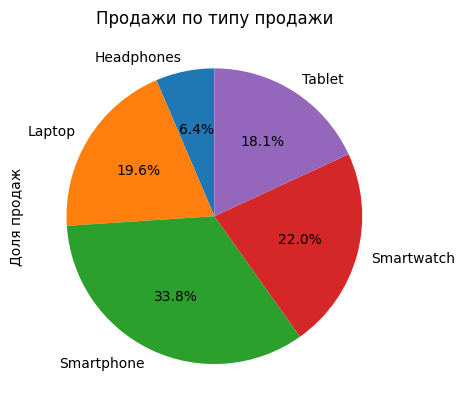

In [74]:
by_product_category.plot(kind='pie', title='Продажи по типу продажи', ylabel='Доля продаж', autopct='%1.1f%%', startangle=90)

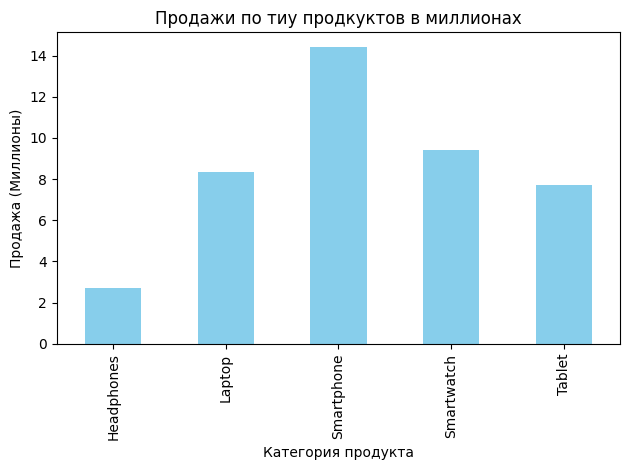

In [75]:
scaled_data = by_product_category / 1e6

ax = scaled_data.plot(kind='bar', title='Продажи по тиу продкуктов в миллионах', 
                     xlabel='Категория продукта', ylabel='Продажа (Миллионы)', color='skyblue')

plt.tight_layout()
plt.show()


In [45]:
by_addon_month_df = succsess_sells_df.groupby(succsess_sells_df["Purchase Date"].str.slice(0,7))["Add-on Total"].sum()

In [49]:
by_addon_month_df

Purchase Date
2023-09     5337.61
2023-10    26153.21
2023-11    24453.33
2023-12    22750.23
2024-01    93254.95
2024-02    80253.72
2024-03    84713.93
2024-04    82294.06
2024-05    89374.18
2024-06    84648.60
2024-07    88811.55
2024-08    87861.11
2024-09    65688.76
Name: Add-on Total, dtype: float64

<Axes: title={'center': 'Продажи допов по месяцам'}, xlabel='Месяцы', ylabel='Продажи'>

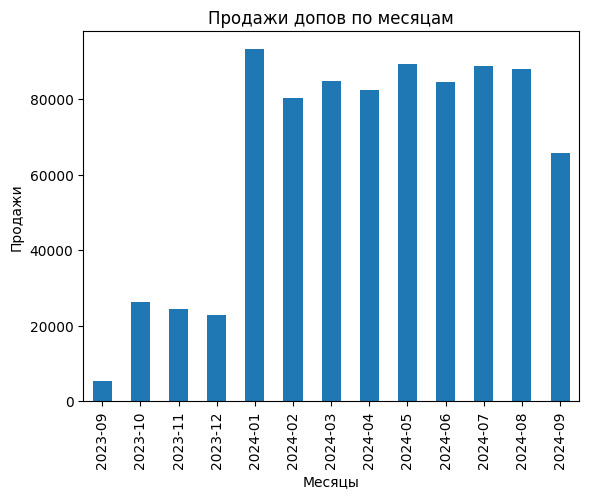

In [76]:
by_addon_month_df.plot(kind='bar', title='Продажи допов по месяцам', xlabel='Месяцы', ylabel='Продажи')

In [ ]:
by_addons_quarter_df = (
    succsess_sells_df.groupby(
        succsess_sells_df["Purchase Date"].str.slice(0,4) 
        + " Q" + 
        ((succsess_sells_df["Purchase Date"].str.slice(5,7).astype(int)-1)//3 +1).astype(str))["Add-on Total"]
    .sum()
)

In [ ]:
by_addons_quarter_df

Purchase Date
2023 Q3      5337.61
2023 Q4     73356.77
2024 Q1    258222.60
2024 Q2    256316.84
2024 Q3    242361.42
Name: Add-on Total, dtype: float64

<Axes: title={'center': 'Продажи допов по месяцам'}, xlabel='Месяцы', ylabel='Продажи'>

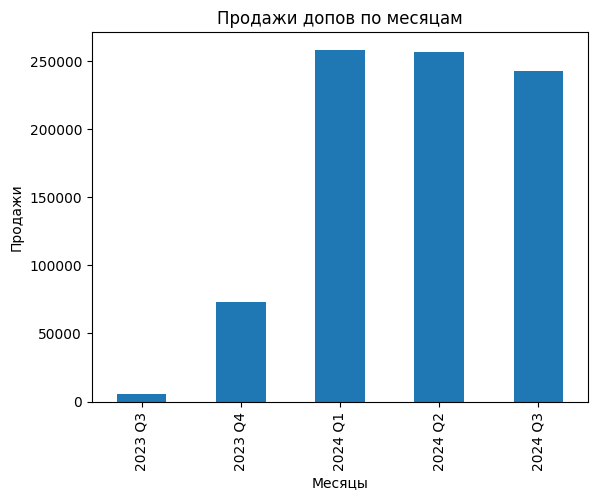

In [78]:
by_addons_quarter_df.plot(kind='bar', title='Продажи допов по месяцам', xlabel='Месяцы', ylabel='Продажи')